# Task 1 : Perform Exploratory Data Analysis (EDA)

In [115]:
# reload the module
%load_ext autoreload
%autoreload 2 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import sys
from pathlib import Path
from importlib import reload
# Add the project root directory to sys.path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))


In [2]:
# import modules
from src.data_loader import DataLoader


## Load Dataset

In [3]:
#load data
data_loader = DataLoader("../data/raw_analyst_ratings/raw_analyst_ratings.csv");
df = data_loader.load_data()
print(df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                       date stock  
0 2020-06-05 10:30:54-04:00     A  
1 2020-06-03 10:45:20-04:00     A  
2 2020-05-26 04:30:07-04:00     

## Descriptive Statistics

In [4]:
# import modules
from src.eda.descriptive_stats import DescriptiveStats

### Basic Statistics

In [5]:
# get descriptive statistics
descriptive_stats = DescriptiveStats(df)
print("descriptive statistics for the DataFrame: ", descriptive_stats.get_descriptive_stats())

descriptive statistics for the DataFrame:           Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06


In [6]:
# get missing values
descriptive_stats.get_missing_values()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [7]:
# get unique values
descriptive_stats.get_unique_values()

Unnamed: 0    1407328
headline       845770
url            883429
publisher        1034
date            39957
stock            6204
dtype: int64

In [8]:
# obtain basic statistics for each column
print("Headline:", descriptive_stats.get_text_length_stats("headline"))
print("-----------------------------------------------------------------------------")
print("URL:", descriptive_stats.get_text_length_stats("url"))
print("-----------------------------------------------------------------------------")
print("Publisher:", descriptive_stats.get_text_length_stats("publisher"))
print("-----------------------------------------------------------------------------")
print("Stock:", descriptive_stats.get_text_length_stats("stock"))

Headline: count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64
-----------------------------------------------------------------------------
URL: count    1.407328e+06
mean     1.105045e+02
std      1.916913e+01
min      3.300000e+01
25%      9.400000e+01
50%      1.150000e+02
75%      1.250000e+02
max      1.620000e+02
Name: url, dtype: float64
-----------------------------------------------------------------------------
Publisher: count    1.407328e+06
mean     1.277136e+01
std      2.701927e+00
min      3.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.400000e+01
max      4.600000e+01
Name: publisher, dtype: float64
-----------------------------------------------------------------------------
Stock: count    1.407328e+06
mean     3.344890e+00
std      6.688505e-01
min      1.000000e+00
25%      3.000000e+00
50%   

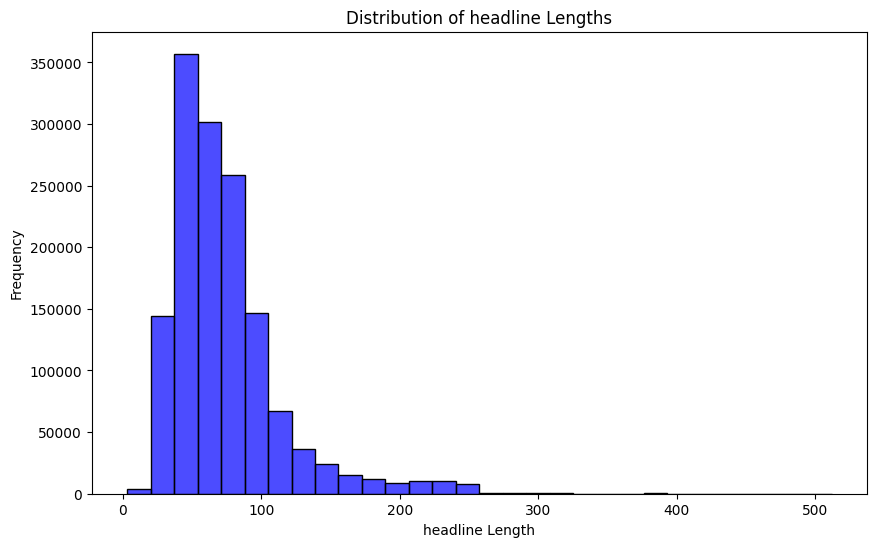

In [9]:
# visualize the distribution of headline lengths
descriptive_stats.plot_text_length_distribution("headline")

### Count the number of articles per publisher to identify which publishers are most active. 

In [10]:
# Count the number of articles per publisher to identify which publishers are most active.
descriptive_stats.get_articles_per_publisher('publisher')

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64

''' Paul Quintaro is the most active publisher with 228373 articles. '''

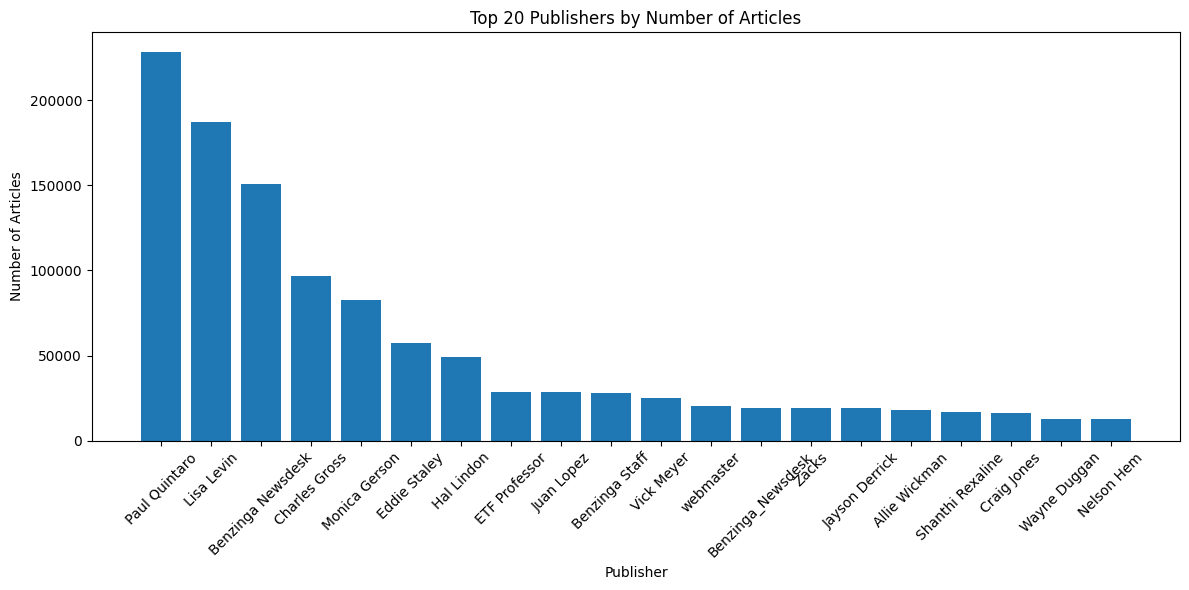

In [11]:
# Visualize the number of articles per publisher
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
top_df = descriptive_stats.get_articles_per_publisher('publisher').nlargest(20)
plt.bar(top_df.index, top_df.values)
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.title('Top 20 Publishers by Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()

### publication trends over time
Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.

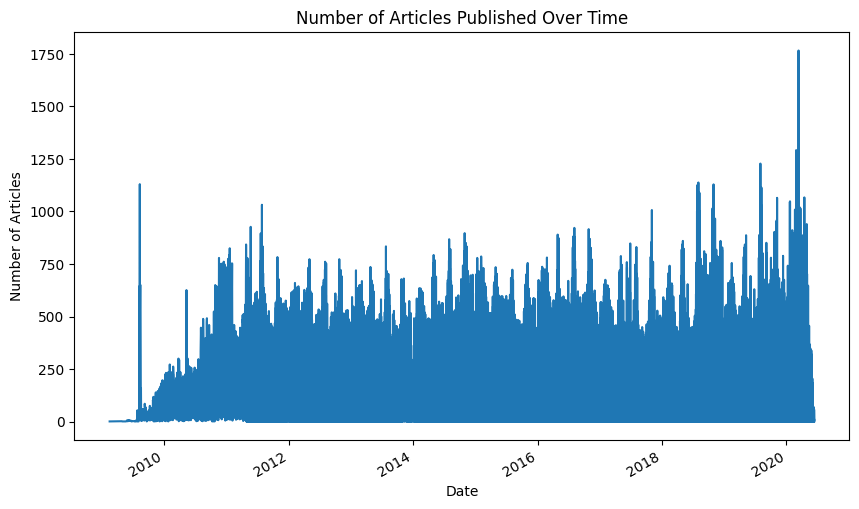

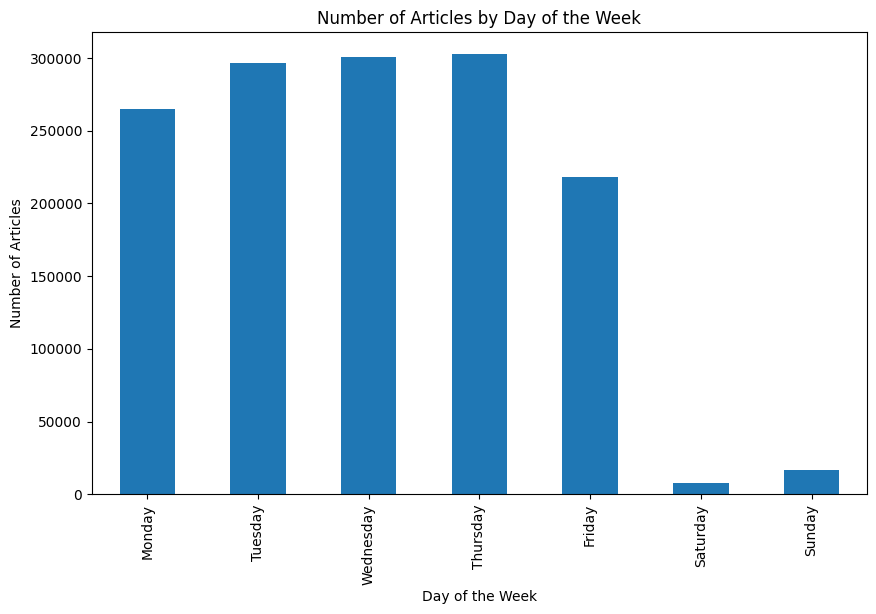

In [12]:
# Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.
descriptive_stats.get_publication_date_trends('date')
# Visualize the number of articles by day of the week
descriptive_stats.plot_publication_weekly_trends('date')

## Text Analysis (Topic Modeling)

In [ ]:
# import the module for text analysis 
from src.eda.text_analysis import TextAnalysis


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock,day_of_week
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,Friday
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,Wednesday
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,Tuesday
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,Friday
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,Friday


In [47]:
# initialize the TextAnalysis class
text_analyzer = TextAnalysis(df)

In [16]:
# perform sentiment analysis on the 'headline' column
df['sentiment_score'], df['sentiment'] = zip(*df['headline'].apply(text_analyzer.analyze_sentiment))
print(df[['headline', 'sentiment_score', 'sentiment']].head())

                                            headline  sentiment_score  \
0            Stocks That Hit 52-Week Highs On Friday            0.000   
1         Stocks That Hit 52-Week Highs On Wednesday            0.000   
2                      71 Biggest Movers From Friday            0.000   
3       46 Stocks Moving In Friday's Mid-Day Session            0.000   
4  B of A Securities Maintains Neutral on Agilent...            0.296   

  sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3   Neutral  
4  Positive  


In [17]:
df.head(10)

,Unnamed: 0,headline,url,publisher,date,stock,day_of_week,sentiment_score,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,Friday,0.000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,Wednesday,0.000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,Tuesday,0.000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,Friday,0.000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,Friday,0.296,Positive
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A,Friday,-0.128,Negative
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A,Friday,0.000,Neutral
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A,Friday,0.296,Positive
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A,Friday,-0.128,Negative
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A,Friday,0.000,Neutral


In [18]:
#count the number of articles for each sentiment category
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
Neutral     731893
Positive    448740
Negative    226695
Name: count, dtype: int64


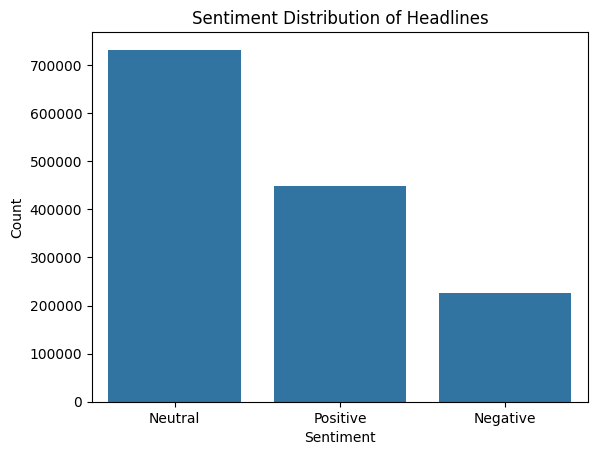

In [19]:

import seaborn as sns
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

#### Topic Modeling

In [20]:
# perform preprocessing
df['processed_headline'] = df['headline'].apply(text_analyzer.preprocess_text)


In [ ]:
# Top words analysis
print("Top words in the headlines:")
text_analyzer.top_words(df, num_words=10)

Topic #1:
stocks pt buy target maintains price raises session 00 moving

Topic #2:
top benzinga says announces stocks upgrades downgrades industry etf energy

Topic #3:
earnings stock scheduled 10 watch stocks analyst alert option may

Topic #4:
shares market update trading higher mid companies lower new stocks

Topic #5:
vs est eps reports sales sees estimate q4 q1 q2



### Publisher Analysis

In [80]:
from src.eda.publisher_analysis import PublisherAnalysis

In [81]:
# Create instance
pa = PublisherAnalysis(df)

In [82]:
# Extract domains
top_domains = pa.extract_domains()
print("\nTop Domains:\n", top_domains.head(10))


Top Domains:
 domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


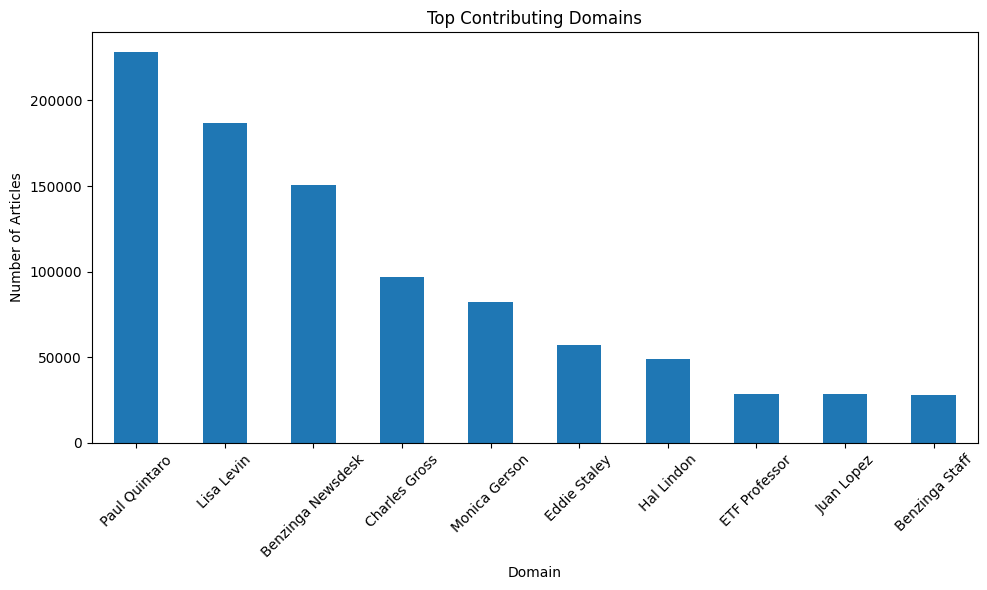

In [83]:
# Plot top domains
pa.plot_top_domains()

In [84]:
# Identify articles mentioning "earnings" or "profit"
mention_count = pa.identify_earnings_mentions()
print(f"\nNumber of articles mentioning 'earnings' or 'profit': {mention_count}")

<string>:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.



Number of articles mentioning 'earnings' or 'profit': 96748


In [85]:
# Compare earnings mentions by publisher
earnings_by_pub = pa.earnings_by_publisher(10)

print("\nEarnings mentions by publisher:\n", earnings_by_pub.head(10))


Earnings mentions by publisher:
 publisher
Lisa Levin               23794
Monica Gerson            22056
Charles Gross             7712
Benzinga Newsdesk         5311
Nelson Hem                4097
Shanthi Rexaline          2938
Paul Quintaro             2761
Benzinga Staff Writer     1873
JJ Kinahan                1676
Garrett Cook              1444
Name: earnings_mentions, dtype: int64


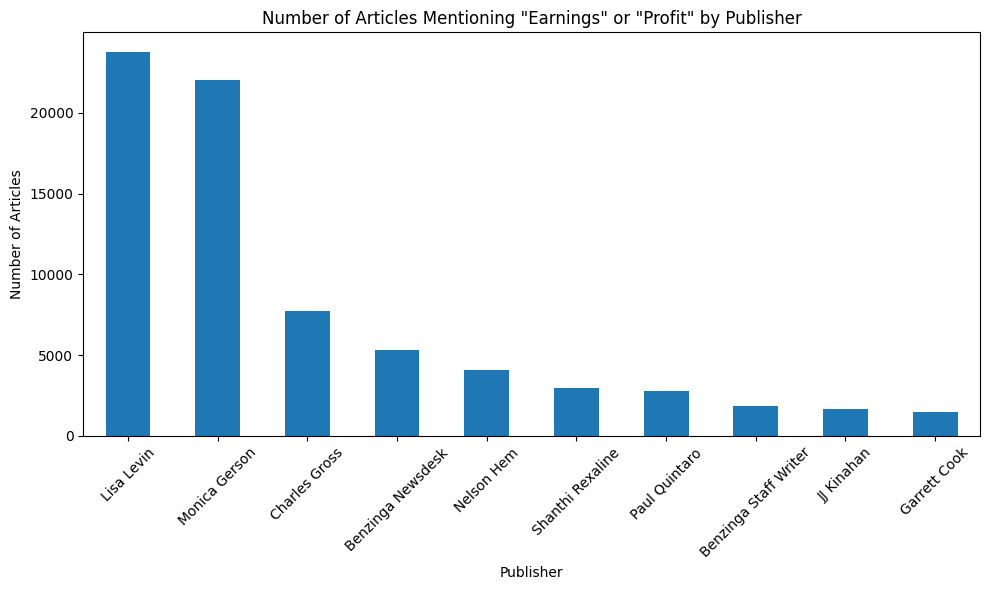

In [86]:
# Plot top publishers for earnings mentions
pa.plot_earnings_by_publisher()

### Time Series Analysis

In [116]:
# reload the module
%load_ext autoreload
%autoreload 2 
from src.eda.time_series_analysis import TimeSeriesAnalysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [117]:
# Create an instance of the time series analysis class
tsa = TimeSeriesAnalysis(df)

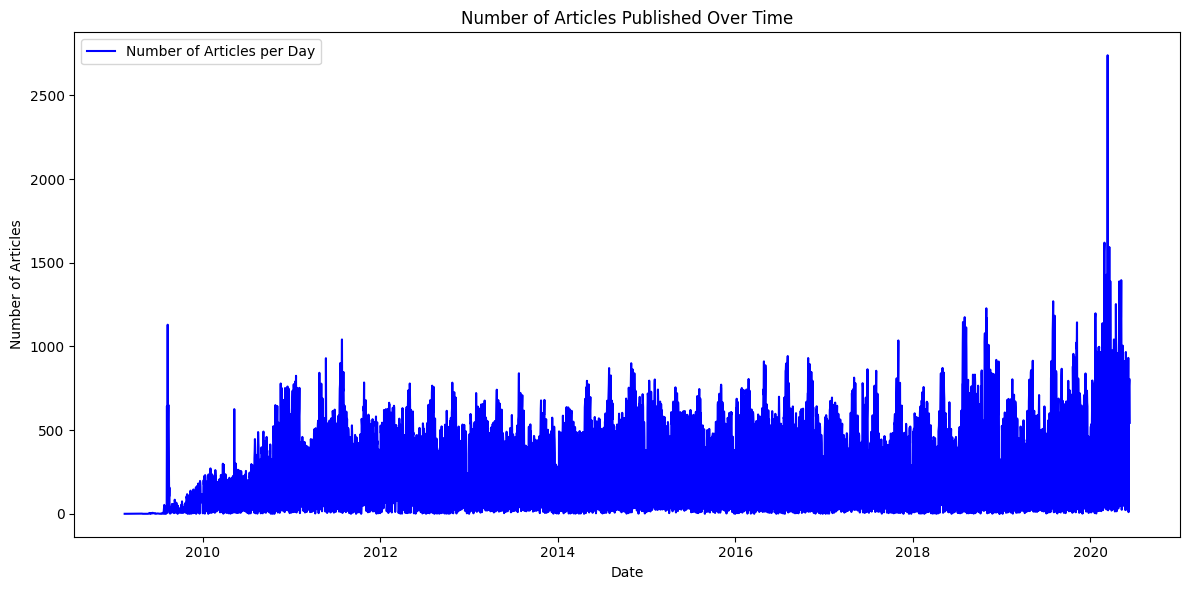

In [118]:
# Plot number of articles per day
tsa.plot_articles_over_time()

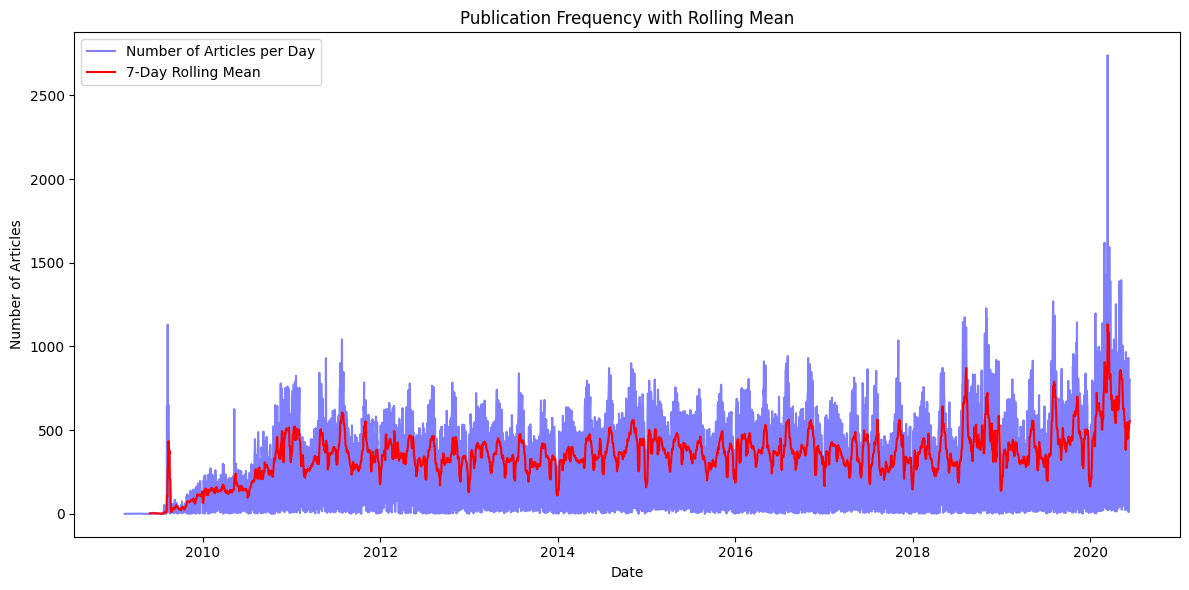

In [119]:
# Plot rolling mean to identify spikes
tsa.plot_rolling_mean(window=7)

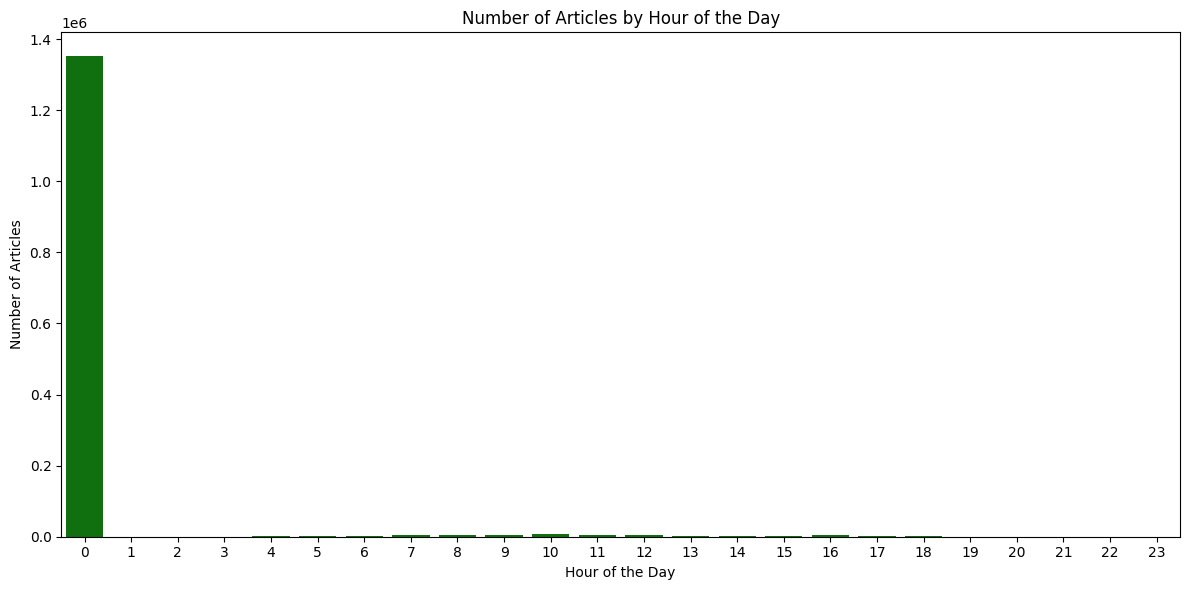

In [120]:
# Plot number of articles by hour of the day
tsa.plot_articles_by_hour()